Central Question: How has systemic bias within the arrest numbers impacted The people relationship with the NYPD and how does arrest data bring to light biases and inconsistencies within the NYPD

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
file_path = 'NYPD_Arrests_Data__Historic__20231221.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [6]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [7]:
nan_df = df.isna()
print(nan_df)

         ARREST_KEY  ARREST_DATE  PD_CD  PD_DESC  KY_CD  OFNS_DESC  LAW_CODE  \
0             False        False  False     True   True       True     False   
1             False        False  False    False  False      False     False   
2             False        False  False    False  False      False     False   
3             False        False  False    False  False      False     False   
4             False        False  False    False  False      False     False   
...             ...          ...    ...      ...    ...        ...       ...   
5498645       False        False  False    False  False      False     False   
5498646       False        False  False    False  False      False     False   
5498647       False        False  False    False  False      False     False   
5498648       False        False  False    False  False      False     False   
5498649       False        False  False    False  False      False     False   

         LAW_CAT_CD  ARREST_BORO  ARRES

In [8]:
df.shape

(5498650, 19)

In [9]:
import matplotlib.pyplot as plt

In [10]:
nypd_data = pd.read_csv('NYPD_Arrests_Data__Historic__20231221.csv')

In [11]:
borough_arrest_counts = nypd_data['ARREST_BORO'].value_counts()

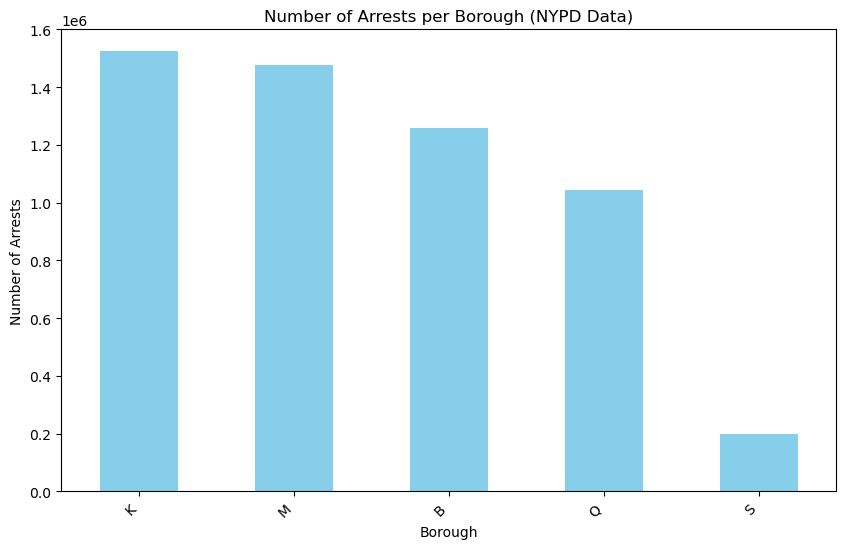

In [12]:
# Plotting the number of arrests per borough
plt.figure(figsize=(10, 6))
borough_arrest_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Arrests per Borough (NYPD Data)')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()#

In [13]:
#B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

I wanted to figure out what the most common arrest was for each borough 

In [14]:
# Subset relevant columns
columns_of_interest = ['ARREST_BORO', 'OFNS_DESC']
subset_df = df[columns_of_interest]

In [15]:
# Find the most common crime type in each borough
most_common_crime_in_borough = subset_df.groupby('ARREST_BORO')['OFNS_DESC'].value_counts().groupby('ARREST_BORO').idxmax().reset_index(name='Most Common Crime')


In [16]:
# Display the DataFrame
print("Most Common Crime Types in Each Borough:")
print(most_common_crime_in_borough)

Most Common Crime Types in Each Borough:
  ARREST_BORO     Most Common Crime
0           B  (B, DANGEROUS DRUGS)
1           K  (K, DANGEROUS DRUGS)
2           M  (M, DANGEROUS DRUGS)
3           Q  (Q, DANGEROUS DRUGS)
4           S  (S, DANGEROUS DRUGS)


In [17]:
# i found the charts made out of this function to be vwey confusing so i just transferred everything to a seperate dataframe to make it more readable 

In [18]:
#B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

In [19]:
#finally i wanted to figure out if there was a bias in the age groups if we filter the arrest by crime
grouped_by_age = df.groupby('AGE_GROUP')['OFNS_DESC'].value_counts().reset_index(name='Crime Count')


In [20]:
# Display the DataFrame
print("Crime Counts Grouped by Age Group:")
(grouped_by_age)

Crime Counts Grouped by Age Group:


,AGE_GROUP,OFNS_DESC,Crime Count
0,1018,OTHER OFFENSES RELATED TO THEFT,1
1,1024,MISCELLANEOUS PENAL LAW,1
2,1042,DANGEROUS DRUGS,1
3,1048,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,1
4,18-24,DANGEROUS DRUGS,308715
...,...,...,...
556,<18,FORTUNE TELLING,1
557,<18,NEW YORK CITY HEALTH CODE,1
558,UNKNOWN,ROBBERY,3
559,UNKNOWN,ASSAULT 3 & RELATED OFFENSES,1


In [21]:
# one last thing i wanted to look at was how arrest rates differed by race and ethnicity? 

In [22]:
# Assuming 'PERP_RACE' is the column indicating the race of individuals
race_arrest_counts = df.groupby('PERP_RACE')['ARREST_KEY'].count().reset_index(name='Total Arrests')


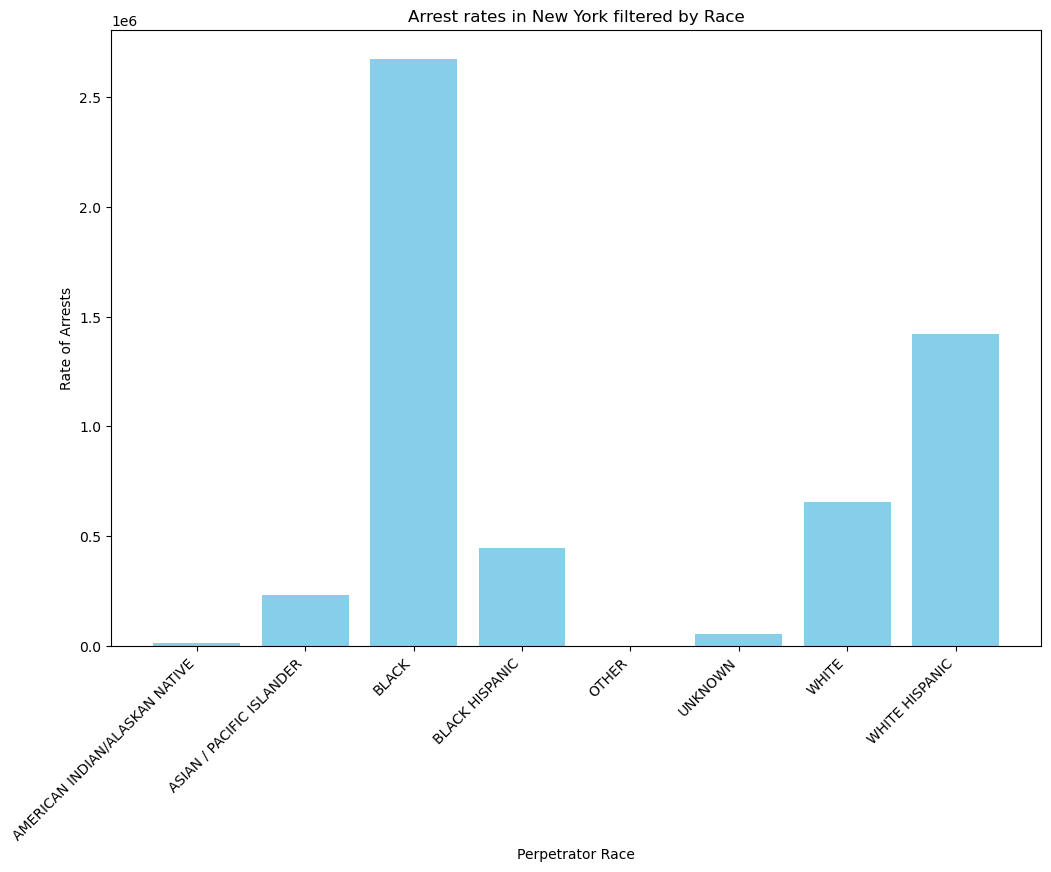

In [23]:
 #Visualize total arrest numbers between different races
plt.figure(figsize=(12, 8))
plt.bar(race_arrest_counts['PERP_RACE'], race_arrest_counts['Total Arrests'], color='skyblue')
plt.title('Arrest rates in New York filtered by Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Rate of Arrests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Analysis #

The firdt thing i wanted to find out with this dataset was how different the number of arrests would be between the 5 boroughs. What i found out was as follows, generally speaking the number of arrests in each borough stays pretty steady between manhatten and the bronx with values between 1.5 and and 1.2 respectively. In comparison, Staten Island only has an arrest rate of 0.8 nearly double the arrest rate for manhatten this can be down to a few factors one of the most probable being that Staten Island having a smaller general population compared to the more metropolitan boroughs and thus crime might be less common in  that area compared to some place like manhatten. I also  wanted to figure out what was the most common cause of arrest in those the 5 boroughs  and i found out that the most common accross all of them were various drug offenses. This is largely indicative of how staunchly new york city penalizes Drug possession and distribution  and could be a very good reason as to why over the last five or so years New York city has slowly began to reform their stance on non-violent drug arrests by decrimanalizing  recreational uses of marijuana and re litigating many of the long prison sentences that vame as a result of those arrests 

Another aspect  of this dataset i wanted to look into further was how different age groups were being treated withinn the nypd's the thing i found most interesting was that a lot of people aged 18-24 were being caught for these drug offenses with 30875 arrests being  made of 18 to 24 year olds for these "dangerous drug" offenses according to cell 20. without specifiynig what these drugs were there is no way of getting a good idea of what thes people were arrested with. but to have such a large portion of your overall data be populated by people so young and have them all be arrested for the same crime  is definetly portraying a certain bias within the data set  

Finally for one last visualization i decided to uses Race and ethnicity to illustrate the differences between how different groups are treated by the police, as shown by the graph above  the majority of the arrests that are within this dataset are of Black induviduals. This provides a good snapshot of how disporiprtionatly  African Americans are placed within the criminal justice system as shown by the next most amount of arrest within a racial group of white-hispanic people  having nearly half as many arrests as the african american group within the chart 